<div class="alert alert-block alert-warning">
<img src="./Imagenes/ITESO_Logo.png" style="width:500px;height:142px;" title="Logo ITESO">
<span style="color:SteelBlue">
<br><font face = "Times New Roman" size = "6"><b><center>Maestría en Sistemas Computacionales</center></b></font>
<br><font face = "Times New Roman" size = "5"><b><center>Programación para Análisis de Datos</center></b></font>

<b><br><font face = "Times New Roman" size = "4"><center>Proyecto</center></font>
<font face = "Times New Roman" size = "4"><center>Semestre de Primavera 2021</center></font>
</span>
</div>

#### Nombre del Alumno: Karla Gabriela López Araiza
#### Matrícula: 735749-1
#### Posgrado de Adscripción: Maestria en Diseño Electronico

#### Explicación de los Datos:

<br>
<img src="./Imagenes/gob.jpg" style="width:268px;height:70px;" class="center">
<br>

Para obtener los datos adecuados se hizo una revisión de diversas bases de datos disponibles en línea. Las bases de datos consultadas fueron las siguientes:
1.	IEEE. Disponible en: https://ieee-dataport.org/
2.	Kagle. Disponible en: https://www.kaggle.com/
3.	Google Dataset Search. Disponible en: https://datasetsearch.research.google.com/
4.	UCI. Disponible en: https://archive.ics.uci.edu/ml/index.php
5.	UNICEF Data. Disponible en: https://data.unicef.org/resources/resource-type/datasets/
6.	IASC-ISI. Disponible en: https://iasc-isi.org/datasets/
7.	TensorFlow. Disponible en: https://www.tensorflow.org/datasets?hl=es-419
8.	Datos Abiertos-Gobierno de México. Disponible en: https://www.datos.gob.mx/

Los datos crudos seleccionados para este proyecto fueron encontrados en la base “Datos Abiertos Gobierno de México”. Es una serie de csv files que contienen información relevante desde Enero a Junio del 2018. Las columnas de información en cada uno de los archivos son:

1.	Categoría: Información sobre la categorización de licencias otorgadas.
2.	Central: Licencias otorgadas en la sucursal central.
3.	Águilas: Licencias otorgadas en la sucursal águilas.
4.	Tlaquepaque: Licencias otorgadas en la sucursal tlaquepaque.
5.	Torres: Licencias otorgadas en la sucursal torres.
6.	Centro sur: Licencias otorgadas en la sucursal centro sur.
7.	Kiosco: Licencias otorgadas en la sucursal kiosco.
8.	Volantas: Licencias otorgadas en la sucursal volantas.
9.	D. Foráneas: Licencias otorgadas en dependencias foráneas.
10.	Total: Total de licencias otorgas por categoría.

Los archivos contenidos en el directorio para su preparación son:
1.	01_licencias_emitidas2018
2.	02_licencias_emitidas2018
3.	03_licencias_emitidas2018
4.	04_licencias_emitidas2018
5.	05_licencias_emitidas2018
6.	06_licencias_emitidas2018


**1.** Cargar las librerías **Pandas**, **Numpy** y **Matplotlib**. Posteriormente a los seis archivos `.CSV` de datos de **Datos Abiertos de México** correspondientes a los meses de enero a junio de 2018 se les agregara una columna llamada **MES** ingresando las fechas correspondientes por cada csv. Finalmente se guardara cada df en un nuevo csv llamado **0{}_licencias_emitidas2018_Mes** evitando setear alguna columna como index.

In [1]:
# Código del Reactivo 1
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

for num in range(1,7):
    df_temp=pd.read_csv('./Datos/0{}_licencias_emitidas2018.csv'.format(num))
    if num==1:
        df_temp.insert(1,'MES','2018-01',True)
    elif num==2:
        df_temp.insert(1,'MES','2018-02',True)
    elif num==3:
        df_temp.insert(1,'MES','2018-03',True)
    elif num==4:
        df_temp.insert(1,'MES','2018-04',True)
    elif num==5:
        df_temp.insert(1,'MES','2018-05',True)
    elif num==6:
        df_temp.insert(1,'MES','2018-06',True)
    df_temp.to_csv('./Datos/0{}_licencias_emitidas2018_Mes.csv'.format(num), index=False)


**2.** Crear un **DataFrame**  donde se inserten a través de una concatenación los seis archivos .CSV creados. Al mismo tiempo por cada csv eliminar renglones **duplicados**. Mostrar el **DataFrame** final con metodo head().

In [2]:
# Código del Reactivo 2
df_append = []
for num in range(1,7):
    df_temp = pd.read_csv('./Datos/0{}_licencias_emitidas2018_MES.csv'.format(num))
    df_temp.drop_duplicates(inplace=True)
    df_append.append(df_temp)
    
MonthLisc_df=pd.concat(df_append)
MonthLisc_df.head()

,CATEGORIA,MES,CENTRAL,AGUILAS,TLAQUEPAQUE,TORRES,CENTRO SUR,Kiosco,VOLANTAS,D. FORANEAS,TOTAL
0,CHOFER,2018-01,9062.0,2384.0,2368,2269.0,959.0,110.0,1001.0,10081.0,28234.0
1,AUTOMOVILISTA,2018-01,3576.0,1314.0,545,692.0,317.0,30.0,335.0,569.0,7378.0
2,MOTOCICLISTA,2018-01,1161.0,57.0,76,62.0,25.0,5.0,66.0,348.0,1800.0
3,PERM. PROV. AUTO,2018-01,265.0,13.0,1,2.0,2.0,0.0,0.0,63.0,346.0
4,PERM. PROV. MOTO,2018-01,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0


**3.**  Re-nombramiento de la columna **D. Foraneas** por **Dependncias Foraneas** para evitar confusiones en el usuario final de la base de datos.

In [3]:
# Código del Reactivo 5
MonthLisc_df.rename(columns = {
        'D. FORANEAS': 'DEPENDENCIAS FORANEAS',
    }, inplace = True)
MonthLisc_df

,CATEGORIA,MES,CENTRAL,AGUILAS,TLAQUEPAQUE,TORRES,CENTRO SUR,Kiosco,VOLANTAS,DEPENDENCIAS FORANEAS,TOTAL
0,CHOFER,2018-01,9062.0,2384.0,2368,2269.0,959.0,110.0,1001.0,10081.0,28234.0
1,AUTOMOVILISTA,2018-01,3576.0,1314.0,545,692.0,317.0,30.0,335.0,569.0,7378.0
2,MOTOCICLISTA,2018-01,1161.0,57.0,76,62.0,25.0,5.0,66.0,348.0,1800.0
3,PERM. PROV. AUTO,2018-01,265.0,13.0,1,2.0,2.0,0.0,0.0,63.0,346.0
4,PERM. PROV. MOTO,2018-01,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
17,MOVIMIENTO,2018-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NUEVAS,2018-06,6393.0,0.0,0,0.0,0.0,0.0,837.0,2689.0,9919.0
19,CANJES,2018-06,5872.0,3227.0,2242,2913.0,1032.0,79.0,1207.0,4914.0,21486.0
20,DUPLICADOS,2018-06,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


**4.** Convertir los nombres de las columnas a **letras mayúsculas** para mantener una homogeneidad en la visualización de datos.

In [4]:
# Código del Reactivo 4
MonthLisc_df.columns =  [col.upper() for col in MonthLisc_df]
MonthLisc_df.head()

,CATEGORIA,MES,CENTRAL,AGUILAS,TLAQUEPAQUE,TORRES,CENTRO SUR,KIOSCO,VOLANTAS,DEPENDENCIAS FORANEAS,TOTAL
0,CHOFER,2018-01,9062.0,2384.0,2368,2269.0,959.0,110.0,1001.0,10081.0,28234.0
1,AUTOMOVILISTA,2018-01,3576.0,1314.0,545,692.0,317.0,30.0,335.0,569.0,7378.0
2,MOTOCICLISTA,2018-01,1161.0,57.0,76,62.0,25.0,5.0,66.0,348.0,1800.0
3,PERM. PROV. AUTO,2018-01,265.0,13.0,1,2.0,2.0,0.0,0.0,63.0,346.0
4,PERM. PROV. MOTO,2018-01,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0


**5.** Realizar un conteo de la cantidad de entradas (renglones) restantes que contienen datos nulos en el **DataFrame** por columna.

In [5]:
# Código del Reactivo 6
MonthLisc_df.isnull().sum()

CATEGORIA                11
MES                       0
CENTRAL                  17
AGUILAS                  17
TLAQUEPAQUE              12
TORRES                   17
CENTRO SUR               17
KIOSCO                   17
VOLANTAS                 17
DEPENDENCIAS FORANEAS    17
TOTAL                    17
dtype: int64

**6.** Debido a que es necesario contar con la información completa para cada columna, es posible realizar la eliminación de los renglones que contienen valores nulos sin afectar el estudio de caso.

In [6]:
# Código del Reactivo 7
Lisc_df = MonthLisc_df.dropna()
Lisc_df.isnull().sum()


CATEGORIA                0
MES                      0
CENTRAL                  0
AGUILAS                  0
TLAQUEPAQUE              0
TORRES                   0
CENTRO SUR               0
KIOSCO                   0
VOLANTAS                 0
DEPENDENCIAS FORANEAS    0
TOTAL                    0
dtype: int64

**7.** La columna **CATEGORÍA** contiene simplificaciones del nombre de la CATEGORÍA por lo cual, es dificil entender el significado de cada uno. Se agrega una columna llamada **DESCRIPCIÓN** inicializada con **'-'** con el método **insert**.

In [7]:
Lisc_df.insert(1,'DESCRIPCIÓN','-')
Lisc_df.head()

,CATEGORIA,DESCRIPCIÓN,MES,CENTRAL,AGUILAS,TLAQUEPAQUE,TORRES,CENTRO SUR,KIOSCO,VOLANTAS,DEPENDENCIAS FORANEAS,TOTAL
0,CHOFER,-,2018-01,9062.0,2384.0,2368,2269.0,959.0,110.0,1001.0,10081.0,28234.0
1,AUTOMOVILISTA,-,2018-01,3576.0,1314.0,545,692.0,317.0,30.0,335.0,569.0,7378.0
2,MOTOCICLISTA,-,2018-01,1161.0,57.0,76,62.0,25.0,5.0,66.0,348.0,1800.0
3,PERM. PROV. AUTO,-,2018-01,265.0,13.0,1,2.0,2.0,0.0,0.0,63.0,346.0
4,PERM. PROV. MOTO,-,2018-01,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0


**8.** Crear la función **funcion_descripcion** que reciba un parámetro **CATEGORÍA** y en base a ese parámetro y sentencias condicionales regrese la descripción correcta para cada **CATEGORÍA**.

In [8]:
# Código del Reactivo 11
def funcion_descripcion(x):
    if x == 'CHOFER':
        return "Licenecia de chofer"
    elif x == 'AUTOMOVILISTA':
        return "Licenecia de automóvilista"
    elif x == 'MOTOCICLISTA':
        return "Licenecia de motociclista"
    elif x == 'PERM. PROV. AUTO':
        return "Permiso provisional para automóvilista"
    elif x == 'PERM. PROV. MOTO':
        return "Permiso provisional para motociclista"
    elif x == 'C.T.P. C1':
        return "Conductor de transporte publico. Vehículo de uso privado con capacidad de carga con mas de 3,000 kg."
    elif x == 'C.T.P. C2':
        return "Conductor de transporte publico. Vehículo de transporte público y colectivo."
    elif x == 'C.T.P. C3':
        return "Conductor de transporte publico. Vehículo de transporte público en el servicio de taxi, radio taxi y autos de arrendamiento con chofer."
    elif x == 'C.T.P. C4':
        return "Conductor de transporte publico. Vehículo de transporte de personal, empresarial y turistico."
    elif x == 'C.T.P. C5':
        return "Conductor de transporte publico. Vehículo acondicionados a la norma técnica correspondientes a la norma tecnica correspondiente para el transporte esoclar y con personas con discapacidad."
    elif x == 'C.T.P. D1':
        return "Conductor de transporte publico. Maquinaría con rodamiento neumatico y equipo movil espacial, cuel quiera que sea su uso y finalidad al que se destine."
    elif x == 'C.T.P. D2':
        return "Conductor de transporte publico. Vehículo adaptado para prestar servicios de seguridad, emergencia y protección civil."
    elif x == 'C1+E':
        return "Conductor de transporte publico. Vehículo de uso privado con capacidad de carga para transportar material tóxico y peligroso de acuerdo a la norma técnica."
    elif x == 'TOTAL':
        return "Total de licencias otorgadas por localizacion"
    elif x == 'PROMEDIO DIARIO':
        return "Promedio diario de licencias otorgadas"
    elif x == 'NUEVAS':
        return "Licencias nuevas"
    elif x == 'CANJES':
        return "Refrendo"

**9.** Aplicar la **función_descripción** a la columna **CATEGORIA** posteriormente guardar el resultado de la operación en la columna **DESCRIPCIÓN**. Transformar la columna MES a formato de tiempo con método **to_datetime** para poder utilizarla en la exploración de datos.

In [9]:
#Apagar los Warnings
pd.set_option("mode.chained_assignment", None)

# Código del Reactivo 12
Lisc_df['DESCRIPCIÓN'] = Lisc_df['CATEGORIA'].apply(funcion_descripcion)

Lisc_df['MES'] = pd.to_datetime(Lisc_df['MES'])
Lisc_df.head(10)


,CATEGORIA,DESCRIPCIÓN,MES,CENTRAL,AGUILAS,TLAQUEPAQUE,TORRES,CENTRO SUR,KIOSCO,VOLANTAS,DEPENDENCIAS FORANEAS,TOTAL
0,CHOFER,Licenecia de chofer,2018-01-01,9062.0,2384.0,2368,2269.0,959.0,110.0,1001.0,10081.0,28234.0
1,AUTOMOVILISTA,Licenecia de automóvilista,2018-01-01,3576.0,1314.0,545,692.0,317.0,30.0,335.0,569.0,7378.0
2,MOTOCICLISTA,Licenecia de motociclista,2018-01-01,1161.0,57.0,76,62.0,25.0,5.0,66.0,348.0,1800.0
3,PERM. PROV. AUTO,Permiso provisional para automóvilista,2018-01-01,265.0,13.0,1,2.0,2.0,0.0,0.0,63.0,346.0
4,PERM. PROV. MOTO,Permiso provisional para motociclista,2018-01-01,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0
5,C.T.P. C1,Conductor de transporte publico. Vehículo de u...,2018-01-01,66.0,0.0,0,0.0,0.0,0.0,0.0,0.0,66.0
6,C.T.P. C2,Conductor de transporte publico. Vehículo de t...,2018-01-01,182.0,0.0,0,0.0,0.0,0.0,0.0,0.0,182.0
7,C.T.P. C3,Conductor de transporte publico. Vehículo de t...,2018-01-01,186.0,0.0,0,0.0,0.0,0.0,0.0,0.0,186.0
8,C.T.P. C4,Conductor de transporte publico. Vehículo de t...,2018-01-01,39.0,0.0,0,0.0,0.0,0.0,8.0,0.0,47.0
9,C.T.P. C5,Conductor de transporte publico. Vehículo acon...,2018-01-01,8.0,0.0,0,0.0,0.0,0.0,0.0,0.0,8.0


### Exploracion de datos
**10.** Es necesario elegir el index que estaremos utilizando para hacer el manejo de datos, en este caso tenemos dos columnas muy importantes **MES** y **CATEGORIA**. Definimos esas columnas como index para nuestro **DataFrame**.

In [10]:
Lisc_df.set_index((['MES','CATEGORIA']), inplace=True)
Lisc_df.head()

DESCRIPCIÓN  CENTRAL  \
MES        CATEGORIA                                                           
2018-01-01 CHOFER                               Licenecia de chofer   9062.0   
           AUTOMOVILISTA                 Licenecia de automóvilista   3576.0   
           MOTOCICLISTA                   Licenecia de motociclista   1161.0   
           PERM. PROV. AUTO  Permiso provisional para automóvilista    265.0   
           PERM. PROV. MOTO   Permiso provisional para motociclista      4.0   

                             AGUILAS TLAQUEPAQUE  TORRES  CENTRO SUR  KIOSCO  \
MES        CATEGORIA                                                           
2018-01-01 CHOFER             2384.0        2368  2269.0       959.0   110.0   
           AUTOMOVILISTA      1314.0         545   692.0       317.0    30.0   
           MOTOCICLISTA         57.0          76    62.0        25.0     5.0   
           PERM. PROV. AUTO     13.0           1     2.0         2.0     0.0   
           PERM. PROV. MOTO      0.0           0     0.0         0.0     0.0   

                             VOLANTAS  DEPENDENCIAS FORANEAS    TOTAL  
MES        CATEGORIA                                                   
2018-01-01 CHOFER              1001.0                10081.0  28234.0  
           AUTOMOVILISTA        335.0                  569.0   7378.0  
           MOTOCICLISTA          66.0                  348.0   1800.0  
           PERM. PROV. AUTO       0.0                   63.0    346.0  
           PERM. PROV. MOTO       0.0                    0.0      4.0

**11.** A partir del método **loc** podemos seleccionar el mes que nosotros querramos y guardar el subset de datos en un nuevo **DataFrame**. Podemos utilizar el nuevo subset de datos para crear una matriz de correlacion de las columnas en la tabla.

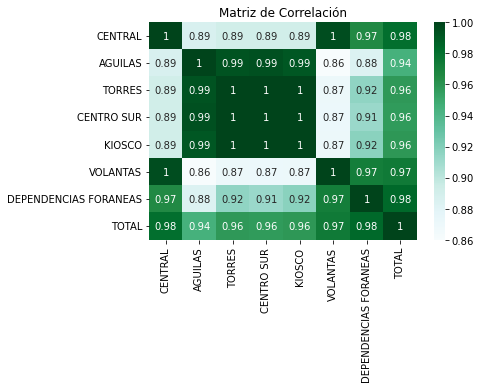

In [11]:
# Código del Reactivo 13
import seaborn as sns
Lisc_subset = Lisc_df.loc['2018-01-01']
#Generación de la Matriz de Correlación
mat_corr = sns.heatmap(Lisc_subset.corr(), annot = True, cmap = 'BuGn')
plt.title('Matriz de Correlación')
plt.show()

**12.** Ya que tenemos 2 columnas como indices podemos hacer filtrado de los datos utilizando el indice de categoria para realizar el analisis de tipos de licencias emitidas durante 2018. Creamos **DataFrames** a partir de cada categoria, reseteamos los index y establecemos la columna MES como nuevo index.

In [12]:

idx = pd.IndexSlice
Chofer_df= Lisc_df.loc[idx[:, 'CHOFER'], :]
Chofer_df.reset_index(inplace=True)
Chofer_df.set_index('MES',inplace=True)
Auto_df= Lisc_df.loc[idx[:, 'AUTOMOVILISTA'], :]
Auto_df.reset_index(inplace=True)
Auto_df.set_index('MES',inplace=True)
Moto_df= Lisc_df.loc[idx[:, 'MOTOCICLISTA'], :]
Moto_df.reset_index(inplace=True)
Moto_df.set_index('MES',inplace=True)
P_auto_df= Lisc_df.loc[idx[:, 'PERM. PROV. AUTO'], :]
P_auto_df.reset_index(inplace=True)
P_auto_df.set_index('MES',inplace=True)
P_moto_df= Lisc_df.loc[idx[:, 'PERM. PROV. MOTO'], :]
P_moto_df.reset_index(inplace=True)
P_moto_df.set_index('MES',inplace=True)
C1_df= Lisc_df.loc[idx[:, 'C.T.P. C1'], :]
C1_df.reset_index(inplace=True)
C1_df.set_index('MES',inplace=True)
C2_df= Lisc_df.loc[idx[:, 'C.T.P. C2'], :]
C2_df.reset_index(inplace=True)
C2_df.set_index('MES',inplace=True)
C3_df= Lisc_df.loc[idx[:, 'C.T.P. C3'], :]
C3_df.reset_index(inplace=True)
C3_df.set_index('MES',inplace=True)
C4_df= Lisc_df.loc[idx[:, 'C.T.P. C4'], :]
C4_df.reset_index(inplace=True)
C4_df.set_index('MES',inplace=True)
C5_df= Lisc_df.loc[idx[:, 'C.T.P. C5'], :]
C5_df.reset_index(inplace=True)
C5_df.set_index('MES',inplace=True)
D1_df= Lisc_df.loc[idx[:, 'C.T.P. D1'], :]
D1_df.reset_index(inplace=True)
D1_df.set_index('MES',inplace=True)
D2_df= Lisc_df.loc[idx[:, 'C.T.P. D2'], :]
D2_df.reset_index(inplace=True)
D2_df.set_index('MES',inplace=True)
E_df= Lisc_df.loc[idx[:, 'C1+E'], :]
E_df.reset_index(inplace=True)
E_df.set_index('MES',inplace=True)
E_df

,CATEGORIA,DESCRIPCIÓN,CENTRAL,AGUILAS,TLAQUEPAQUE,TORRES,CENTRO SUR,KIOSCO,VOLANTAS,DEPENDENCIAS FORANEAS,TOTAL
MES,,,,,,,,,,,
2018-01-01,C1+E,Conductor de transporte publico. Vehículo de u...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-01,C1+E,Conductor de transporte publico. Vehículo de u...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-01,C1+E,Conductor de transporte publico. Vehículo de u...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2018-04-01,C1+E,Conductor de transporte publico. Vehículo de u...,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2.0
2018-05-01,C1+E,Conductor de transporte publico. Vehículo de u...,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0
2018-06-01,C1+E,Conductor de transporte publico. Vehículo de u...,3.0,0.0,0,0.0,0.0,0.0,0.0,0.0,3.0


**13.** Utilizando los **DataFrames** creados a partir de categoria y la columna **TOTAL** podemos crear series de tiempo para poder analizar las licencias emitidas en un periodo de tiempo.

In [13]:
ts=Chofer_df['TOTAL']
ts1=Auto_df['TOTAL']
ts2=Moto_df['TOTAL']
ts3=P_auto_df['TOTAL']
ts4=P_moto_df['TOTAL']
ts5=C1_df['TOTAL']
ts6=C2_df['TOTAL']
ts7=C3_df['TOTAL']
ts8=C4_df['TOTAL']
ts9=C5_df['TOTAL']
ts10=D1_df['TOTAL']
ts11=D2_df['TOTAL']
ts12=E_df['TOTAL']

**14.** Todas las series de tiempo se graficaran en un solo plot para visualizar mejor la información sobre licencias otorgadas desde Enero hasta Junio.

[]

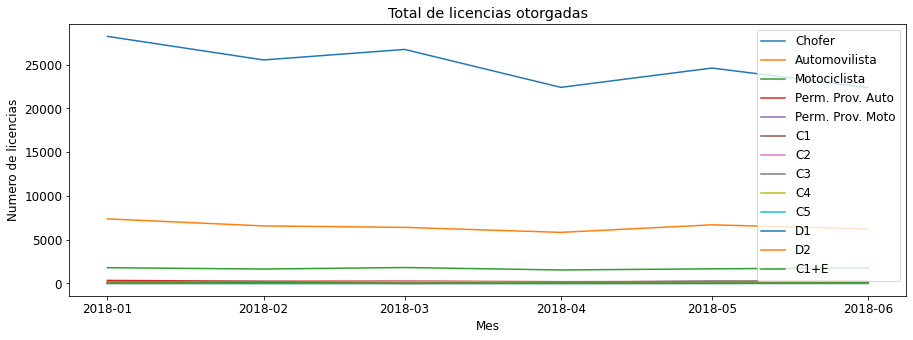

In [19]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': (15,5)}) 
plt.plot(ts, label = 'Chofer');
plt.plot(ts1, label = 'Automovilista');
plt.plot(ts2, label = 'Motociclista');
plt.plot(ts3, label = 'Perm. Prov. Auto');
plt.plot(ts4, label = 'Perm. Prov. Moto');
plt.plot(ts5, label = 'C1');
plt.plot(ts6, label = 'C2');
plt.plot(ts7, label = 'C3');
plt.plot(ts8, label = 'C4');
plt.plot(ts9, label = 'C5');
plt.plot(ts10, label = 'D1');
plt.plot(ts11, label = 'D2');
plt.plot(ts11, label = 'C1+E');
plt.legend(loc='upper right');
plt.xlabel('Mes');
plt.ylabel('Numero de licencias');
plt.title('Total de licencias otorgadas');
plt.plot()

**15.** Es posible hacer un análisis utilizando la **CATEGORIA** **TOTAL** y crear series asociadas a un mes del año utilizando el método **iloc** y los indices de la columna MES.

In [15]:
# Código del Reactivo 15

idx = pd.IndexSlice
Total_df=Lisc_df.loc[idx[:, 'TOTAL'], :]
Total_df.reset_index(inplace=True)
Total_df.set_index('MES',inplace=True)

Enero_df=Total_df.iloc[0]
Febrero_df=Total_df.iloc[1]
Marzo_df=Total_df.iloc[2]
Abril_df=Total_df.iloc[3]
Mayo_df=Total_df.iloc[4]
Junio_df=Total_df.iloc[5]

**16.** Para convertir la serie de renglón a columna, se usa el método .transpose(). Se convierte la **serie** en un **DataFrame** por medio del método .to_frame(), posteriormente el DataFrame generado contendrá los encabezados de las columnas en su índice y tendrá que ser renombrado. Se eliminarán los renglones que no son de interés (CATEGORIA, DESCRIPCION y TOTAL), para ello se emplea el método **.drop()**.

In [16]:
Enero_df = Enero_df.transpose()
Enero_df = Enero_df.to_frame()
Enero_df = Enero_df.rename(columns = {1: 'MES'})
Enero_df = Enero_df.drop(['CATEGORIA','DESCRIPCIÓN','TOTAL'])
Febrero_df = Febrero_df.transpose()
Febrero_df = Febrero_df.to_frame()
Febrero_df = Febrero_df.rename(columns = {1: 'MES'})
Febrero_df = Febrero_df.drop(['CATEGORIA','DESCRIPCIÓN','TOTAL'])
Marzo_df = Marzo_df.transpose()
Marzo_df = Marzo_df.to_frame()
Marzo_df = Marzo_df.rename(columns = {1: 'MES'})
Marzo_df = Marzo_df.drop(['CATEGORIA','DESCRIPCIÓN','TOTAL'])
Abril_df = Abril_df.transpose()
Abril_df = Abril_df.to_frame()
Abril_df = Abril_df.rename(columns = {1: 'MES'})
Abril_df = Abril_df.drop(['CATEGORIA','DESCRIPCIÓN','TOTAL'])
Mayo_df = Mayo_df.transpose()
Mayo_df = Mayo_df.to_frame()
Mayo_df = Mayo_df.rename(columns = {1: 'MES'})
Mayo_df = Mayo_df.drop(['CATEGORIA','DESCRIPCIÓN','TOTAL'])
Junio_df = Junio_df.transpose()
Junio_df = Junio_df.to_frame()
Junio_df = Junio_df.rename(columns = {1: 'MES'})
Junio_df = Junio_df.drop(['CATEGORIA','DESCRIPCIÓN','TOTAL'])

Junio_df

,2018-06-01
CENTRAL,12265
AGUILAS,3227
TLAQUEPAQUE,2242
TORRES,2913
CENTRO SUR,1032
KIOSCO,79
VOLANTAS,2044
DEPENDENCIAS FORANEAS,7603


**17.** Finalmente los **DataFrame** pueden ser graficados por medio de matplotlib para apreciar mejor cual es la sucursal preferida por los clientes.

[]

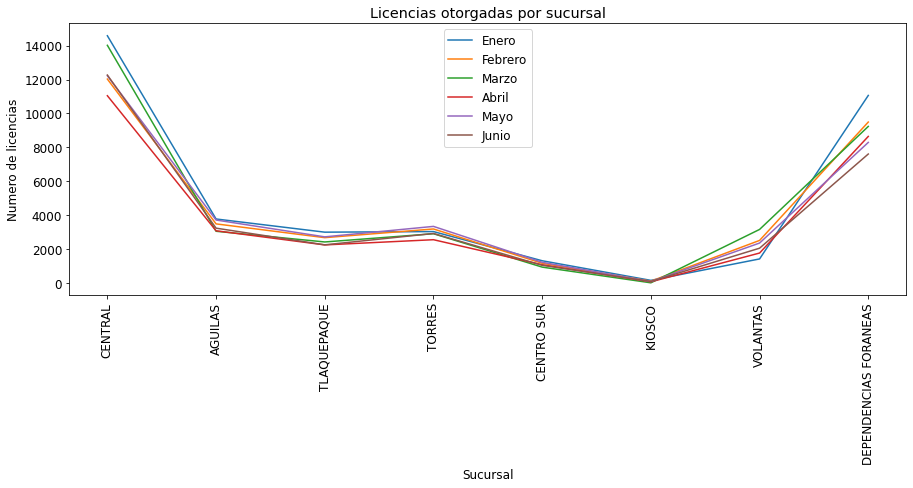

In [20]:
plt.plot(Enero_df, label='Enero');
plt.plot(Febrero_df, label='Febrero');
plt.plot(Marzo_df, label='Marzo');
plt.plot(Abril_df, label='Abril');
plt.plot(Mayo_df, label='Mayo');
plt.plot(Junio_df, label='Junio');
plt.legend(loc='upper center');
plt.title('Licencias otorgadas por sucursal');
plt.xlabel('Sucursal');
plt.ylabel('Numero de licencias');
plt.xticks(rotation='vertical');
plt.plot()

<div class="alert alert-block alert-danger">
<b>.: Fin de la Evaluación :.</b>
</div>